# NLP Project Tutorial

**Objetivo de la tarea:** Crear un detector de spam en URL's usando NLP

**Step 1:** Importar y transformar los datos

In [1]:
%pip install -r ..//requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.5 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 143.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 160.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 129.1 MB/s eta 0:00:00m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 28.3 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 169.3 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 182.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 181.3 MB/s eta 0:00:00m eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.6/

In [31]:
# a pesar de ejecutar requirements, debo ejecutar esto para que funcione
! pip install pandas
! pip install sklearn
! pip install WordCloud


[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 kB 14.3 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip


In [38]:
# importo librerias
import pandas as pd
import pickle
import numpy as np
import re
import unicodedata
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

In [4]:
# leer el dataset:
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv')

In [7]:
# vemos las primeras 5 columnas:
df_raw.head(5)

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True


In [6]:
# infrmación del dataset:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      2999 non-null   object
 1   is_spam  2999 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 26.5+ KB


***El dataset contiene 2999 filas (URL's) y 2 columnas: la URL y si es o no es spam***

In [8]:
df_raw['is_spam'].value_counts()

False    2303
True      696
Name: is_spam, dtype: int64

In [9]:
# hacemos una copia del dataset:
df = df_raw.copy()

In [10]:
df = df.drop_duplicates().reset_index(drop = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      2369 non-null   object
 1   is_spam  2369 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 20.9+ KB


In [12]:
# varias funciones

def comas(text):
    """
    Elimina comas del texto
    """
    return re.sub(',', ' ', text)

def espacios(text):
    """
    Elimina enters dobles por un solo enter
    """
    return re.sub(r'(\n{2,})','\n', text)

def minuscula(text):
    """
    Cambia mayusculas a minusculas
    """
    return text.lower()

def numeros(text):
    """
    Sustituye los numeros
    """
    return re.sub('([\d]+)', ' ', text)

def caracteres_no_alfanumericos(text):
    """
    Sustituye caracteres raros, no digitos y letras
    Ej. hola 'pepito' como le va? -> hola pepito como le va
    """
    return re.sub("(\\W)+"," ",text)

def comillas(text):
    """
    Sustituye comillas por un espacio
    Ej. hola 'pepito' como le va? -> hola pepito como le va?
    """
    return re.sub("'"," ", text)

def palabras_repetidas(text):
    """
    Sustituye palabras repetidas

    Ej. hola hola, como les va? a a ustedes -> hola, como les va? a ustedes
    """
    return re.sub(r'\b(\w+)( \1\b)+', r'\1', text)

def esp_multiple(text):
    """
    Sustituye los espacios dobles entre palabras
    """
    return re.sub(' +', ' ',text)



#df['texto_limpio'] = df['texto'].apply(espacios).apply(comas).apply(url).apply(minuscula).apply(esp_multiple).apply(comillas)


In [13]:
'/'
'.'
'  '

'  '

In [14]:
# funcón para eliminar https
def url(text):
    return re.sub(r'(https://www|https://)', '', text)

In [15]:
# se limpia url
df['url_limpia'] = df['url'].apply(url).apply(caracteres_no_alfanumericos).apply(esp_multiple)

In [16]:
df.head()

,url,is_spam,url_limpia
0,https://briefingday.us8.list-manage.com/unsubs...,True,briefingday us8 list manage com unsubscribe
1,https://www.hvper.com/,True,hvper com
2,https://briefingday.com/m/v4n3i4f3,True,briefingday com m v4n3i4f3
3,https://briefingday.com/n/20200618/m#commentform,False,briefingday com n 20200618 m commentform
4,https://briefingday.com/fan,True,briefingday com fan


In [17]:
df['is_spam'] = df['is_spam'].apply(lambda x: 1 if x == True else 0)

In [18]:
df.head()

,url,is_spam,url_limpia
0,https://briefingday.us8.list-manage.com/unsubs...,1,briefingday us8 list manage com unsubscribe
1,https://www.hvper.com/,1,hvper com
2,https://briefingday.com/m/v4n3i4f3,1,briefingday com m v4n3i4f3
3,https://briefingday.com/n/20200618/m#commentform,0,briefingday com n 20200618 m commentform
4,https://briefingday.com/fan,1,briefingday com fan


In [28]:
# Building a stop words list from scratch

stop_words = ['is','you','your','and', 'the', 'to', 'from', 'or', 'I', 'for', 'do', 'get', 'not', 'here', 'in', 'im', 'have', 'on', 
're', 'new', 'subject']

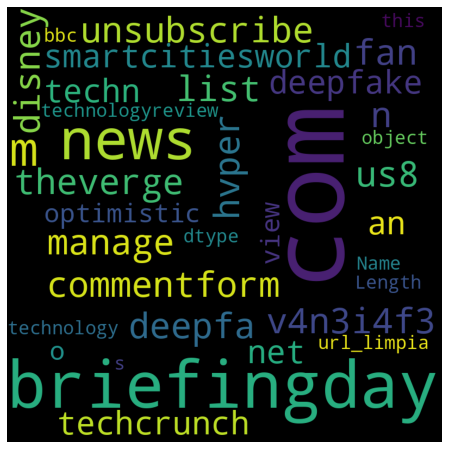

In [36]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                      , min_font_size = 20).generate(str(df['url_limpia']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Step 2:** Usar técnicas de NLP para preprocesamiento de datos

In [20]:
vec = CountVectorizer().fit_transform(df['url_limpia'])

***CountVectorizer = transformamos el cuerpo del texto en una matriz dispersa de números que la computadora puede pasar a los algoritmos de aprendizaje aútomatico***

In [21]:
X_train, X_test, y_train, y_test = train_test_split(vec, df['is_spam'], stratify = df['is_spam'], random_state = 2207)

**Step 3:** Utilizar SVM para construir un clasificador de spam en URL's

In [22]:
classifier = SVC(C = 1.0, kernel = 'linear', gamma = 'auto')

In [23]:
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       532
           1       0.71      0.64      0.67        61

    accuracy                           0.94       593
   macro avg       0.83      0.80      0.82       593
weighted avg       0.93      0.94      0.93       593



In [39]:
# Use accuracy_score function to get the accuracy

print("SVM Accuracy Score -> ",accuracy_score(predictions, y_test)*100)

SVM Accuracy Score ->  94.60370994940978


***Nuestro modelo logro una precisión del 94%***

In [24]:
# optimizo hiperparámetros
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(random_state=1234),param_grid,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(random_state=1234),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [25]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [26]:
grid.best_estimator_

SVC(C=10, gamma=0.1, random_state=1234)

In [27]:
predictions = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       532
           1       0.82      0.61      0.70        61

    accuracy                           0.95       593
   macro avg       0.89      0.80      0.83       593
weighted avg       0.94      0.95      0.94       593

